In [40]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings

warnings.simplefilter('ignore')


In [8]:
#loading data
p=r'C:\Users\AU\far\khodam\q5\Fashion-MNIST/'
testData = pd.read_csv(p+'testData.csv')
trainData = pd.read_csv(p+'trainData.csv')
testLabels = pd.read_csv(p+'testLabels.csv')
trainLabels = pd.read_csv(p+'trainLabels.csv')

# first part

In [41]:
def toarr(x):
    a = []
    for i in x['9']:
        a.append(i)
    return a;
y_train = toarr(trainLabels)
y_test = toarr(testLabels)
X_train = trainData.to_numpy()
X_test = testData.to_numpy()

In [44]:
#Normalize the data
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [54]:
c = np.unique(trainLabels)
mean = np.mean(trainData,axis=0)
fet = trainData.shape[1]
Sw = np.zeros((fet,fet))
Sb = np.zeros((fet,fet))
for i in c:
    inx = list((trainLabels==i)['9'])
    Xc = trainData.iloc[inx,:]
    cmean = np.mean(Xc,axis=0)
    #within-class variance
    Sw += (Xc-cmean).T.dot(Xc-cmean)
    print(Sw)
    
    
   

               0        0.1           0.2           0.3            0.4  \
0      49.989333    48.8440     47.818667     46.273333      45.362667   
0.1    48.844000   996.7185   3216.723000    410.122500    1012.804000   
0.2    47.818667  3216.7230  18293.167333   8540.021667    4127.165333   
0.3    46.273333   410.1225   8540.021667  91019.995833   60741.206667   
0.4    45.362667  1012.8040   4127.165333  60741.206667  147371.669333   
...          ...        ...           ...           ...            ...   
0.346  48.293333  5336.2900  26474.486667  21866.983333   49617.026667   
0.347  21.570667  5472.9710  26405.951333  35248.501667   51834.597333   
0.348  33.562667  5402.3540  25815.065333   3030.956667   20516.869333   
0.349  35.418667  1457.4980   6321.617333    650.396667    8319.765333   
0.350  34.878667    99.2255     70.562333     33.984167      66.625333   

                 0.5            0.6            0.7          0.8          0.9  \
0           2.450667      94.31

                0          0.1           0.2            0.3            0.4  \
0      306.946500   304.794667    303.717167     302.038833     298.960667   
0.1    304.794667  1375.407667   3593.949000     848.899000    1983.147000   
0.2    303.717167  3593.949000  21737.075833   11725.780500    7285.062667   
0.3    302.038833   848.899000  11725.780500  102372.909500   81477.737667   
0.4    298.960667  1983.147000   7285.062667   81477.737667  311805.238667   
...           ...          ...           ...            ...            ...   
0.346  149.221833  5704.009500  22462.548833   26409.343333   99461.189333   
0.347  150.481833  7622.936667  35478.183167   52861.287500  101757.626000   
0.348  185.571167  8230.129500  36650.064500   16033.197000   72177.522333   
0.349  194.130500  3131.832333  10624.103833    5418.976500   41579.374667   
0.350  210.600833   520.182167   2291.509833    2337.784000    2759.176667   

                 0.5            0.6            0.7            0

                0          0.1           0.2            0.3            0.4  \
0      509.886333   445.630000    445.431500     576.709333     521.789833   
0.1    445.630000  1775.928833   3961.402167    1354.267500    2880.283500   
0.2    445.431500  3961.402167  30570.382333   34196.092667   27142.099833   
0.3    576.709333  1354.267500  34196.092667  215365.761833  214408.313000   
0.4    521.789833  2880.283500  27142.099833  214408.313000  719278.246167   
...           ...          ...           ...            ...            ...   
0.346 -343.996000  5095.394000  24354.416667   45632.699000  152374.244167   
0.347   85.753333  7739.468500  41693.911000   73639.140500  135332.939833   
0.348  305.808333  8818.520500  41675.723500   25787.239500  113540.702000   
0.349  353.750167  3572.636000  11865.672500    5666.635500   58980.254500   
0.350  377.413333   652.946333   2385.100667    2624.872333    4240.514167   

                 0.5            0.6            0.7            0

                0          0.1           0.2            0.3           0.4  \
0      513.883667   447.588667    445.338833     625.671333  5.935358e+02   
0.1    447.588667  3718.965446   6442.643113    2191.855780  4.523899e+03   
0.2    445.338833  6442.643113  35257.839446   39306.699446  2.996433e+04   
0.3    625.671333  2191.855780  39306.699446  377614.397613  4.000445e+05   
0.4    593.535833  4523.899092  29964.325925  400044.496092  1.122028e+06   
...           ...          ...           ...            ...           ...   
0.346 -302.089333  4947.604526  23923.080526   73704.776193  1.817858e+05   
0.347  140.451333  7968.861346  41871.990346  118510.160846  1.838148e+05   
0.348  364.201667  9273.677927  42370.202593   38212.655260  1.252025e+05   
0.349  352.836167  3993.404156  12283.346156    3720.296156  5.473199e+04   
0.350  376.504000   631.556284   2350.205951    2332.618951  3.609400e+03   

                0.5            0.6            0.7            0.8  \
0      

In [56]:
 for i in c:
    inx = list((trainLabels==i)['9'])
    cmean = np.mean(Xc,axis=0)
    dmean = np.array(cmean-mean).reshape(fet,1)
    #between-class variance
    Sb += len(c) * (dmean).dot(dmean.T)
    print(Sb)

[[ 6.40021334e-06 -1.24092151e-05  1.81997265e-04 ... -2.11564596e-02
  -1.32780838e-02 -9.41190944e-04]
 [-1.24092151e-05  2.40599198e-05 -3.52869989e-04 ...  4.10197355e-02
   2.57445477e-02  1.82485181e-03]
 [ 1.81997265e-04 -3.52869989e-04  5.17529694e-03 ... -6.01607725e-01
  -3.77577247e-01 -2.67638231e-02]
 ...
 [-2.11564596e-02  4.10197355e-02 -6.01607725e-01 ...  6.99345099e+01
   4.38918561e+01  3.11118820e+00]
 [-1.32780838e-02  2.57445477e-02 -3.77577247e-01 ...  4.38918561e+01
   2.75471299e+01  1.95262432e+00]
 [-9.41190944e-04  1.82485181e-03 -2.67638231e-02 ...  3.11118820e+00
   1.95262432e+00  1.38407948e-01]]
[[ 1.28004267e-05 -2.48184302e-05  3.63994530e-04 ... -4.23129192e-02
  -2.65561675e-02 -1.88238189e-03]
 [-2.48184302e-05  4.81198396e-05 -7.05739978e-04 ...  8.20394710e-02
   5.14890954e-02  3.64970361e-03]
 [ 3.63994530e-04 -7.05739978e-04  1.03505939e-02 ... -1.20321545e+00
  -7.55154493e-01 -5.35276462e-02]
 ...
 [-4.23129192e-02  8.20394710e-02 -1.2032154

In [46]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test= lda.transform(X_test)
lda.scalings_

array([[-5.25110790e-03, -5.51995048e-04,  4.97951072e-03, ...,
        -5.46590435e-03,  6.83144618e-03,  3.00108854e-02],
       [ 1.21924779e-02, -1.70659332e-04, -1.88969555e-02, ...,
        -4.34028864e-03, -1.04336946e-02, -2.97244441e-02],
       [-1.81088165e-02,  4.23935476e-03,  4.57256932e-02, ...,
         7.46946704e-03,  9.07658887e-03,  2.36361273e-02],
       ...,
       [ 1.74652465e-05,  9.12430845e-03,  2.39725272e-02, ...,
         1.31490528e-02, -2.36383540e-02,  5.40100583e-02],
       [ 3.40013068e-03, -8.63279756e-03,  6.02728631e-03, ...,
         3.40906720e-02,  2.24402919e-02, -9.79773818e-03],
       [ 2.33864708e-03,  2.39269655e-03,  1.68964445e-03, ...,
        -8.10611232e-05, -1.16762797e-02,  4.69921965e-03]])

# second part

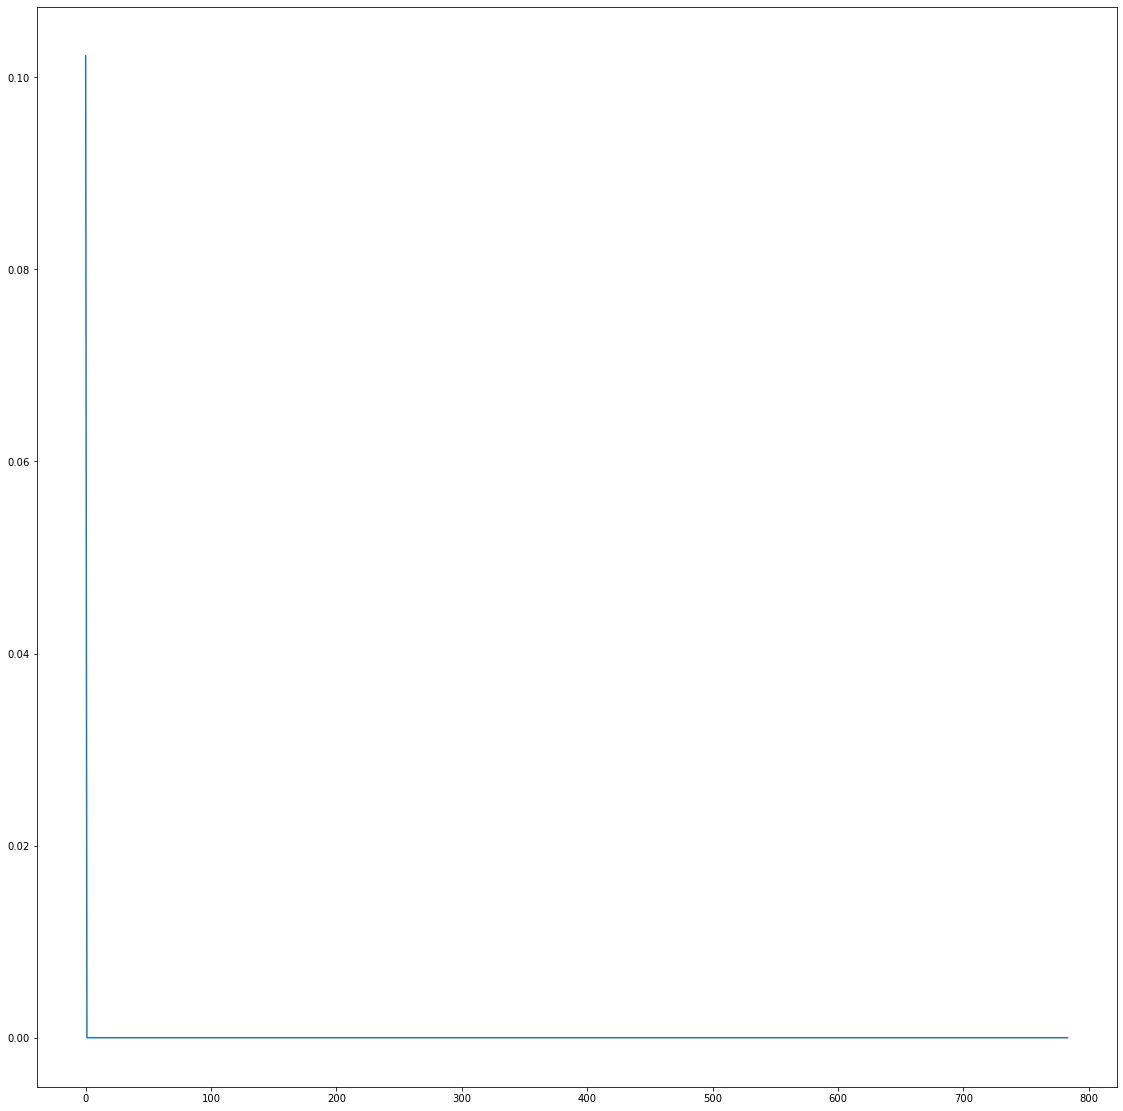

In [69]:
A = np.linalg.inv(Sw).dot(Sb)
e_values, e_vectors = np.linalg.eig(A)
e_vectors = e_vectors.T

sorted_inx = np.argsort(abs(e_values))[::-1]
e_values,e_vectors = e_values[sorted_inx],e_vectors[sorted_inx]

fig = plt.figure(figsize=(3,3))
ax = fig.add_axes([0,0,5,5])
plt.plot(e_values)
plt.show()

# third part

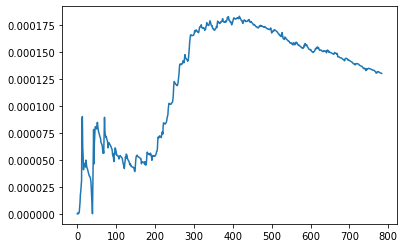

In [72]:
diag = np.diag(A)
t = []
fig = []
f = 1
for i in diag:
    t.append(i)
    fig.append(sum(t)/f)
    f+=1
plt.plot(fig)
plt.show()

# fourth and last part

original data :


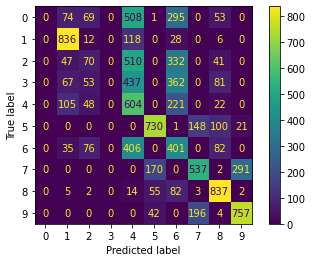

LDA applied data :


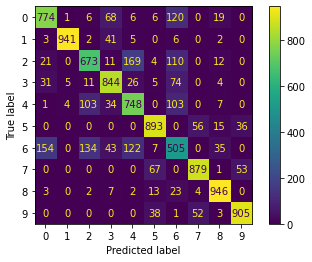

0.47724772477247723
0.8108810881088109


In [81]:
lda = LDA()
X_train1 = lda.fit_transform(trainData, trainLabels)
X_test1 = lda.transform(testData)
gb = GaussianNB()
# transformed data
y_p1 = gb.fit(X_train1, trainLabels).predict(X_test1)

# initial data
y_p = gb.fit(X_train, trainLabels).predict(X_test)
print('original data :')
cm = metrics.confusion_matrix(testLabels, y_p)
cm_d = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1','2', '3', '4', '5', '6','7','8','9'])
cm_d.plot()
plt.show()

print('LDA applied data :')
cm1 = metrics.confusion_matrix(testLabels, y_p1)
cm_d = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=['0','1','2', '3', '4', '5', '6','7','8','9'])
cm_d.plot()
plt.show()



print(metrics.accuracy_score(testLabels, y_p))
print(metrics.accuracy_score(testLabels, y_p1))